### Most Popular Language 2019

There are three fundamental questions that arise when someone wants to learn a programming language.
The first question is about what programming language is the most popular at the moment?

Let's take a look the necessary libraries we will need to wrangle our data.
We need pandas, numpy, itertools, and matplotlib

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_2019 = pd.read_csv("./input/2019 Survey Result.csv")
df_2019['Year'] = '2019'

In [3]:
# we only need information of the language that respondent worked with
df_2019_lang = df_2019[['Respondent','LanguageWorkedWith']]

In [4]:
df_2019_lang.head()

,Respondent,LanguageWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


As shown above the LanguageWorkedWith columns has grouping Language item, every language is separated by semicolon.
We need to split the grouping item into one per row to be able to analyze it. With use of itertools library we can make functions to split it.

In [5]:
# def splitter(values):
#     return list(itertools.product( *[str(v).split(';') for v in values]))

# def expand(df):
#     tuples=list()
#     for i,row in df.iterrows():
#         tuples.extend(splitter(row))
#     return  pd.DataFrame.from_records(tuples,columns=df.columns)

def splitter(values):
    '''
    Description : split grouping values using semicolon (;) separator
    
    INPUT:
    values - each row in a dataframe
    
    OUTPUT:
    list - list that containing items (language) that have been split
    
    '''
    return list(itertools.product( *[str(v).split(';') for v in values]))

def expand(df):
    
    '''
    INPUT:
    df - a dataframe that contains grouping values inside a column/columns that needs to be splitted
    
    OUTPUT: 
    a fresh rebuild dataframe
    
    '''
    tuples=list()
    for i,row in df.iterrows():
        tuples.extend(splitter(row))
    return  pd.DataFrame.from_records(tuples,columns=df.columns)

In [6]:
df_2019_lang = expand(df_2019_lang)

In [7]:
# Now we can use our function and take a look at the results
df_2019_lang.head()

,Respondent,LanguageWorkedWith
0,1,HTML/CSS
1,1,Java
2,1,JavaScript
3,1,Python
4,2,C++


In [8]:
# Now that the grouping language already splitted, we can calculate how much each language appears in the dataset
# Use percentage for easier to understand

most_used_lang = pd.DataFrame(df_2019_lang['LanguageWorkedWith'].value_counts().reset_index())
most_used_lang.rename(columns={'index':'LanguageWorkedWith','LanguageWorkedWith':'count'}, inplace=True)
most_used_lang = most_used_lang.sort_values('count', ascending=True)
most_used_lang['perc'] = (most_used_lang['count']/len(df_2019[df_2019['LanguageWorkedWith'].notnull()]))*100

In [9]:
# Create plot function to visualize the result in bar chart

def plot_barh(df,x_col,y_col):
    x_pos = [i for i, _ in enumerate(df[x_col])]
    plt.figure(figsize=(10,10))
    plt.barh(x_pos,df[y_col])
    plt.yticks(x_pos, df[x_col])
    plt.title('Most Popular Language 2019', fontsize=20)
    plt.xlabel('Percentage of Respondents (%)', fontsize=12)
    plt.show()

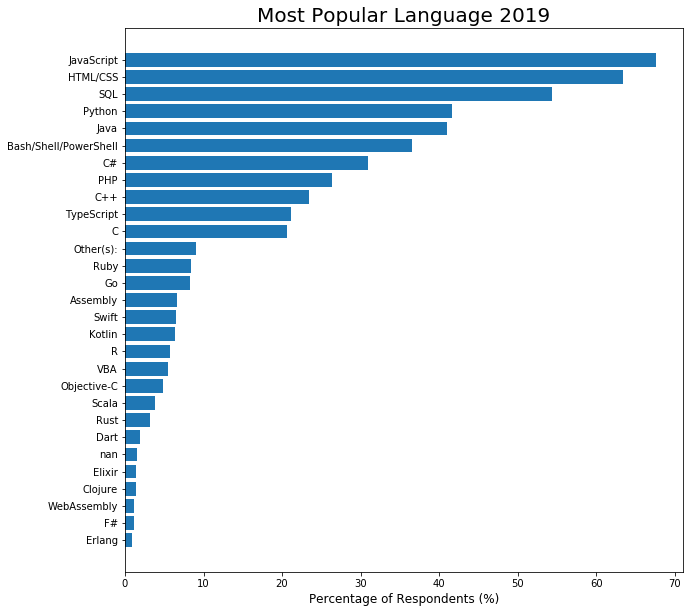

In [10]:
plot_barh(most_used_lang,'LanguageWorkedWith','perc')

As result above, Javascript is the most popular language nowadays.
We may also want to know, who use Javascript or what kind of programmer is using JavaScript.
Let's take a look at below simple analysis

### Users of Javascript

In [11]:
# Now we need to know which developer are using JavaScript
df_2019_lang_user = df_2019[['Respondent','LanguageWorkedWith','DevType']]
df_2019_lang_user = df_2019_lang_user[df_2019_lang_user['DevType'].notnull()]
df_2019_lang_user = expand(df_2019_lang_user)

In [12]:
df_2019_lang_user.head()

,Respondent,LanguageWorkedWith,DevType
0,2,C++,"Developer, desktop or enterprise applications"
1,2,C++,"Developer, front-end"
2,2,HTML/CSS,"Developer, desktop or enterprise applications"
3,2,HTML/CSS,"Developer, front-end"
4,2,Python,"Developer, desktop or enterprise applications"


In [13]:
# Calculate total user per language
df_2019_lang_user = df_2019_lang_user.groupby(['LanguageWorkedWith','DevType']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)

In [14]:
# Show total user for javascript
df_2019_lang_user[df_2019_lang_user['LanguageWorkedWith']=='JavaScript'][:10]

,LanguageWorkedWith,DevType,count
323,JavaScript,"Developer, full-stack",36376
319,JavaScript,"Developer, back-end",29372
322,JavaScript,"Developer, front-end",23376
320,JavaScript,"Developer, desktop or enterprise applications",11748
325,JavaScript,"Developer, mobile",9953
334,JavaScript,Student,7574
315,JavaScript,Database administrator,7436
316,JavaScript,Designer,7192
335,JavaScript,System administrator,6558
317,JavaScript,DevOps specialist,6529


JavaScript is commonly used by Full Stack Developer, followed by Back End Developer.
No wonder as the javascript is widely known for its capability to made interactive application of website